In [ ]:
'''
    Copyright (c) 2018 Intel Corporation
    File name: blur-license-plate-tutorial.py
    Author: Iman Saleh (iman.saleh@intel.com)
    Reviewer: Soila Kavulya
    Date created: 4/16/2018
    Date last modified: 5/29/2018
    Python Version: 2.7
    license: Affero GPLv3 http://www.gnu.org/licenses/agpl-3.0.html
    notes: The tutorial uses openalpr library https://github.com/openalpr/openalpr. For commercial licensing Contact: info@openalpr.com 
   
    Neither the name of Intel nor the names of contributors may be used to endorse or promote products 
    derived from this software without specific prior written permission.
   
    THIS SOFTWARE IS PROVIDED BY Intel Corporation "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
    INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS 
    FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL <copyright holder> BE LIABLE 
    FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES 
    (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
    OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, 
    WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) 
    ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
'''

In [ ]:
!apt-get install python-openalpr

In [18]:
from openalpr import Alpr
from PIL import Image
from PIL import ImageFilter
import IPython.display as dp
import sys, getopt
import os

In [19]:
# Define input and output directory for images
inputdir = 'license-plate'
outputdir = 'license-plate-processed'

In [ ]:
# create output directory
!mkdir $outputdir

In [21]:
# The following code blurs license plates in one image file, specified by the input directory indir
# and the file name filename. It saves the blurred image under outdir using the same filename
def blur_license(indir, outdir, filename, alpr):
    file_path = indir + "/" + filename
    print(file_path)
    results = alpr.recognize_file(file_path)
    # Loop on all plates within a photo
    i = 0
    for plate in results['results']:
        i += 1
        print("Plate #%d" % i)
        print(plate["coordinates"])
        # Blur the license plate area
        image = Image.open(file_path)
        box = (plate["coordinates"][0][u'x'], plate["coordinates"][0][u'y'],
               plate["coordinates"][2][u'x'], plate["coordinates"][2][u'y'])
        ic = image.crop(box)
        for b in range(10):  # with the BLUR filter, you can blur a few times to get the effect you're seeking
            ic = ic.filter(ImageFilter.BLUR)
        image.paste(ic, box)
        image.save(outdir + "/" + filename)

In [22]:
# The following code loops on all image files under the directory specified by indir
# and call blur_license on each one.
def blur_licenses(indir, outdir):
    # Initialize the license plate recognition library, use "us" for USA plates, "eu" for european plates
    alpr = Alpr("us", "openalpr/openalpr.conf", "runtime_data")
    for root, dirs, filenames in os.walk(indir):
        for f in filenames:
            blur_license(indir, outdir, f, alpr)


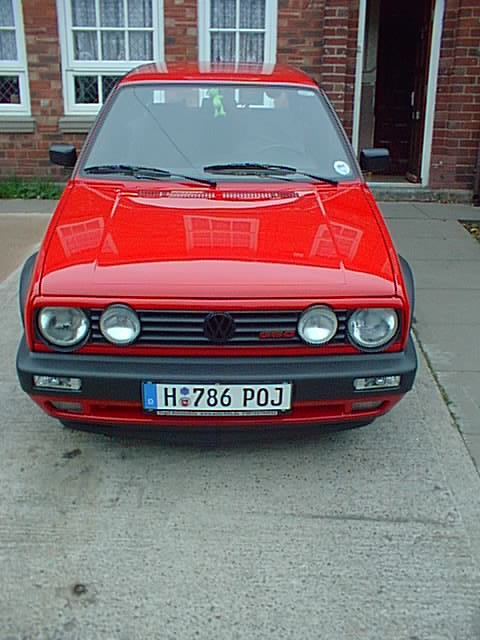

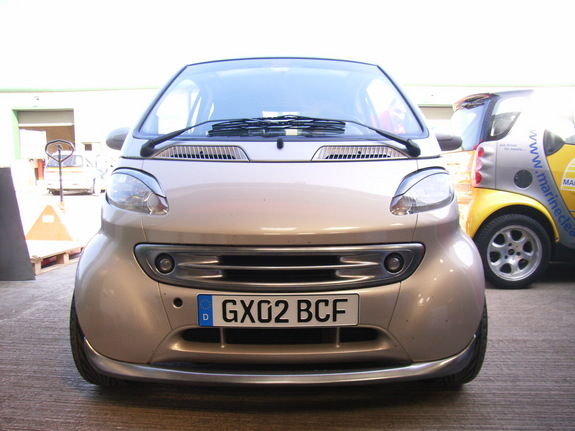

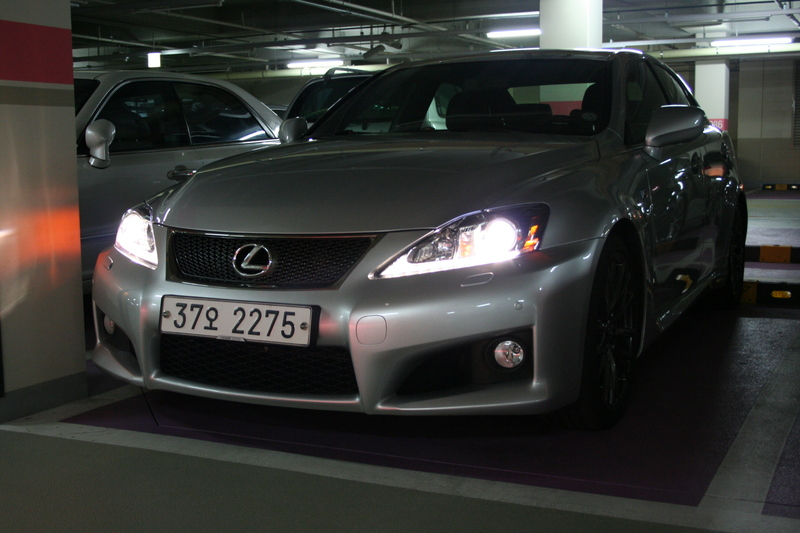

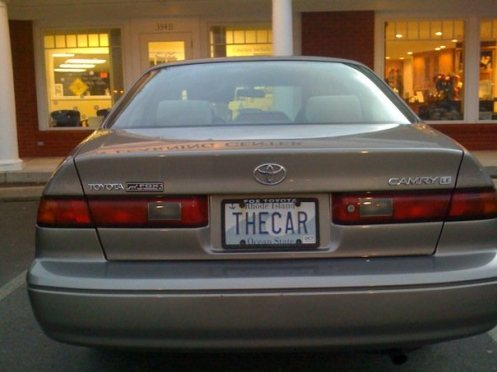

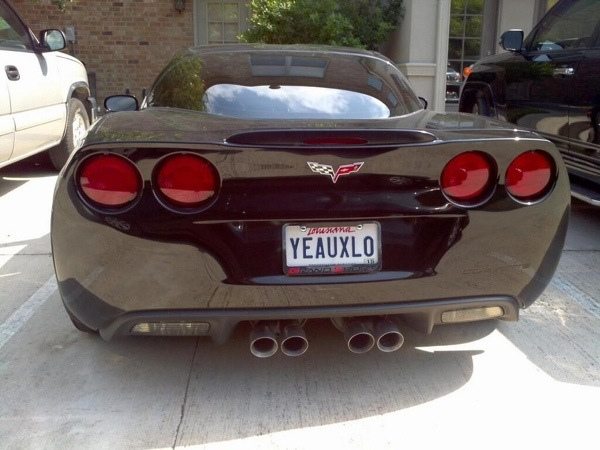

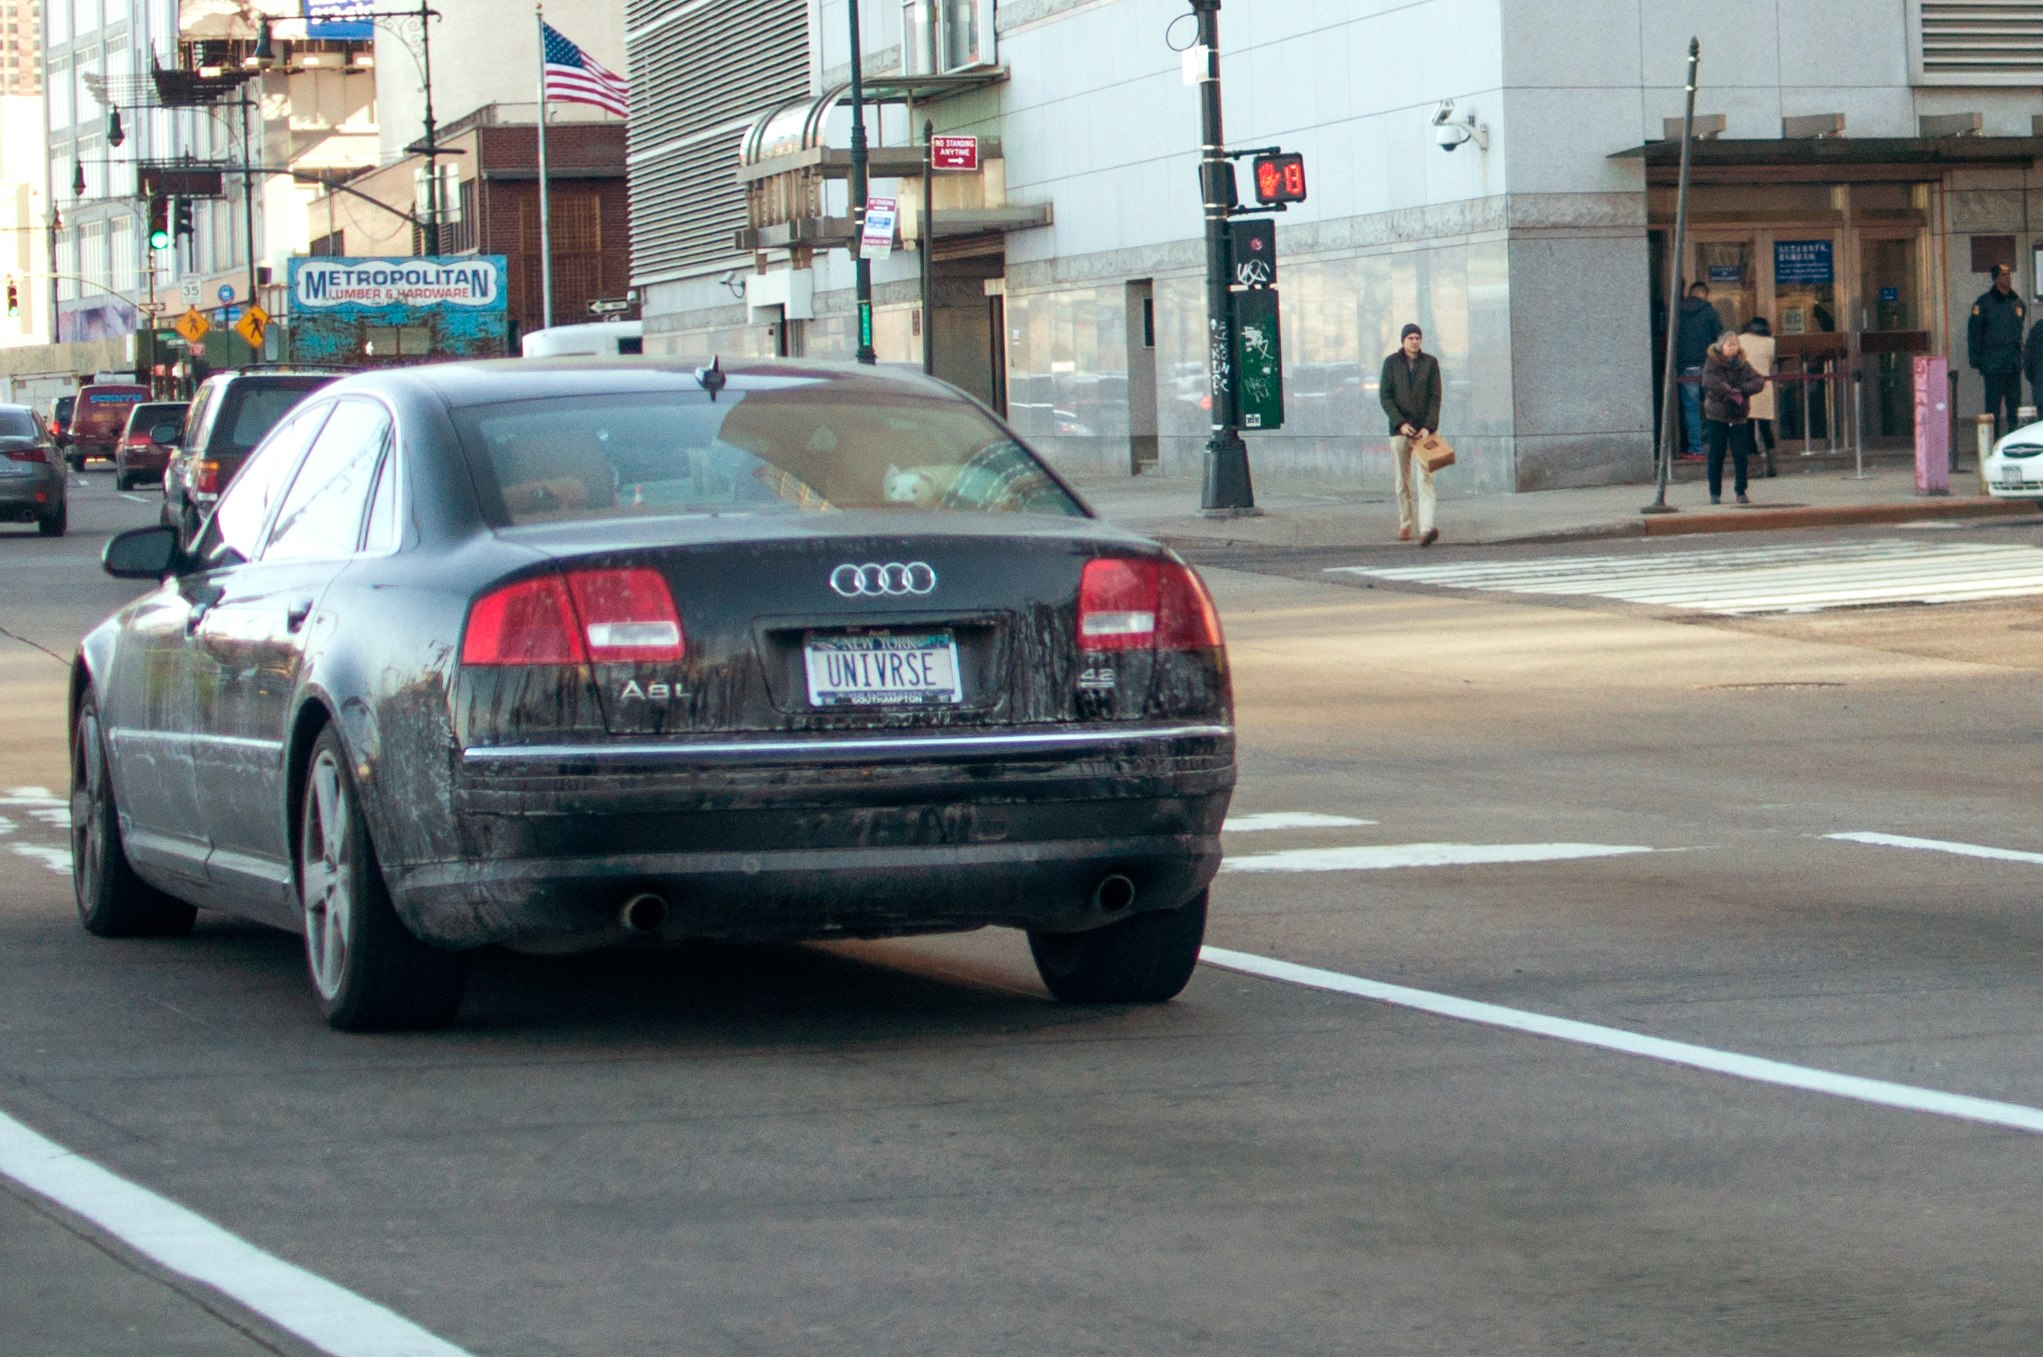

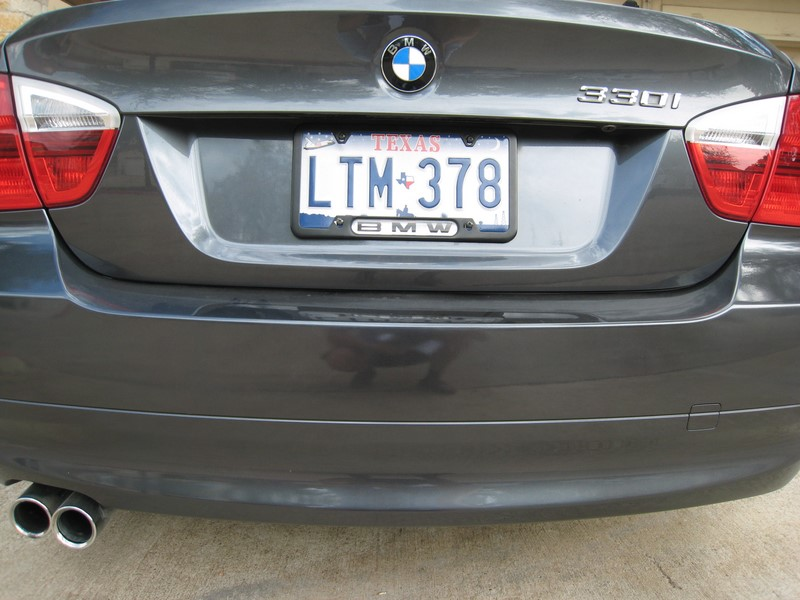

In [28]:
# Display all images under the input directory
fs = !ls $inputdir/*.*

# create list of image objects
images = [dp.Image(filename=ea, format='png') for ea in fs]

# display all images
for ea in images:
    dp.display_png(ea)

In [24]:
#Cleanup output directory
!rm $outputdir/*.*

In [25]:
# Apply the license plate blurring on all files under the input directory and save the blurred images in the ooutput directory
blur_licenses(inputdir, outputdir)

license-plate/us-3.jpg
Plate #1
[{u'y': 637, u'x': 803}, {u'y': 635, u'x': 951}, {u'y': 701, u'x': 961}, {u'y': 703, u'x': 808}]
license-plate/us-2.jpg
Plate #1
[{u'y': 223, u'x': 284}, {u'y': 221, u'x': 380}, {u'y': 262, u'x': 382}, {u'y': 264, u'x': 286}]
license-plate/eu-3.jpg
license-plate/us-4.jpg
Plate #1
[{u'y': 134, u'x': 290}, {u'y': 137, u'x': 507}, {u'y': 243, u'x': 507}, {u'y': 240, u'x': 290}]
license-plate/kr-1.jpg
Plate #1
[{u'y': 283, u'x': 173}, {u'y': 291, u'x': 282}, {u'y': 344, u'x': 278}, {u'y': 337, u'x': 169}]
license-plate/eu-2.jpg
Plate #1
[{u'y': 378, u'x': 190}, {u'y': 378, u'x': 268}, {u'y': 415, u'x': 268}, {u'y': 415, u'x': 190}]
license-plate/us-1.jpg
Plate #1
[{u'y': 203, u'x': 218}, {u'y': 201, u'x': 317}, {u'y': 242, u'x': 319}, {u'y': 244, u'x': 219}]


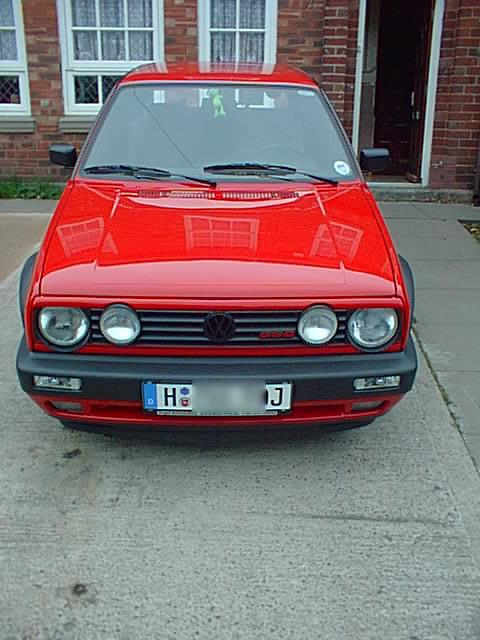

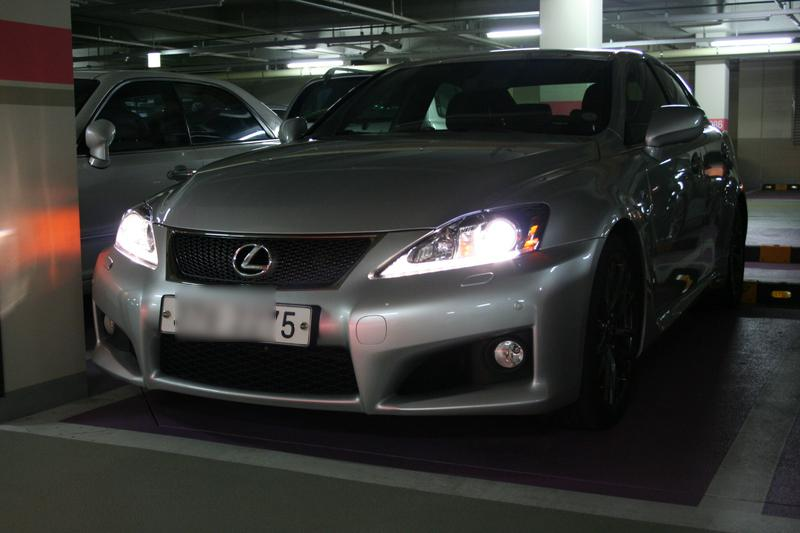

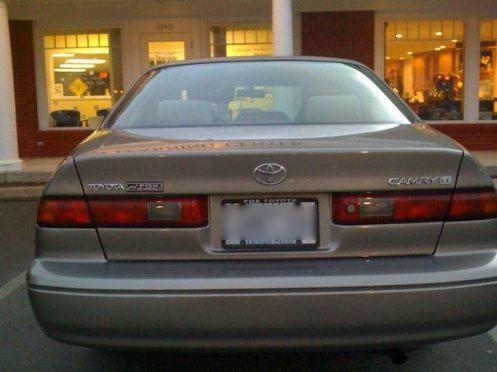

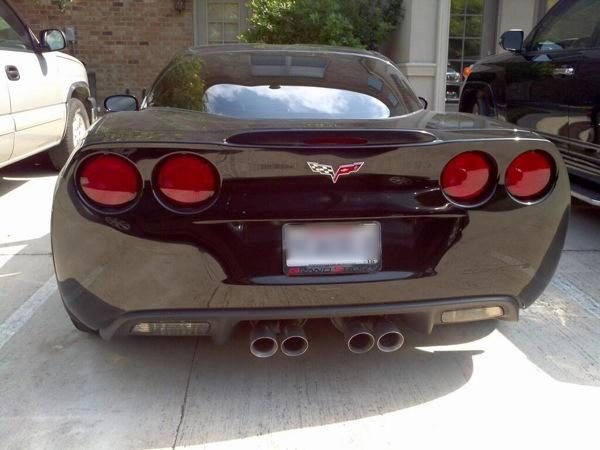

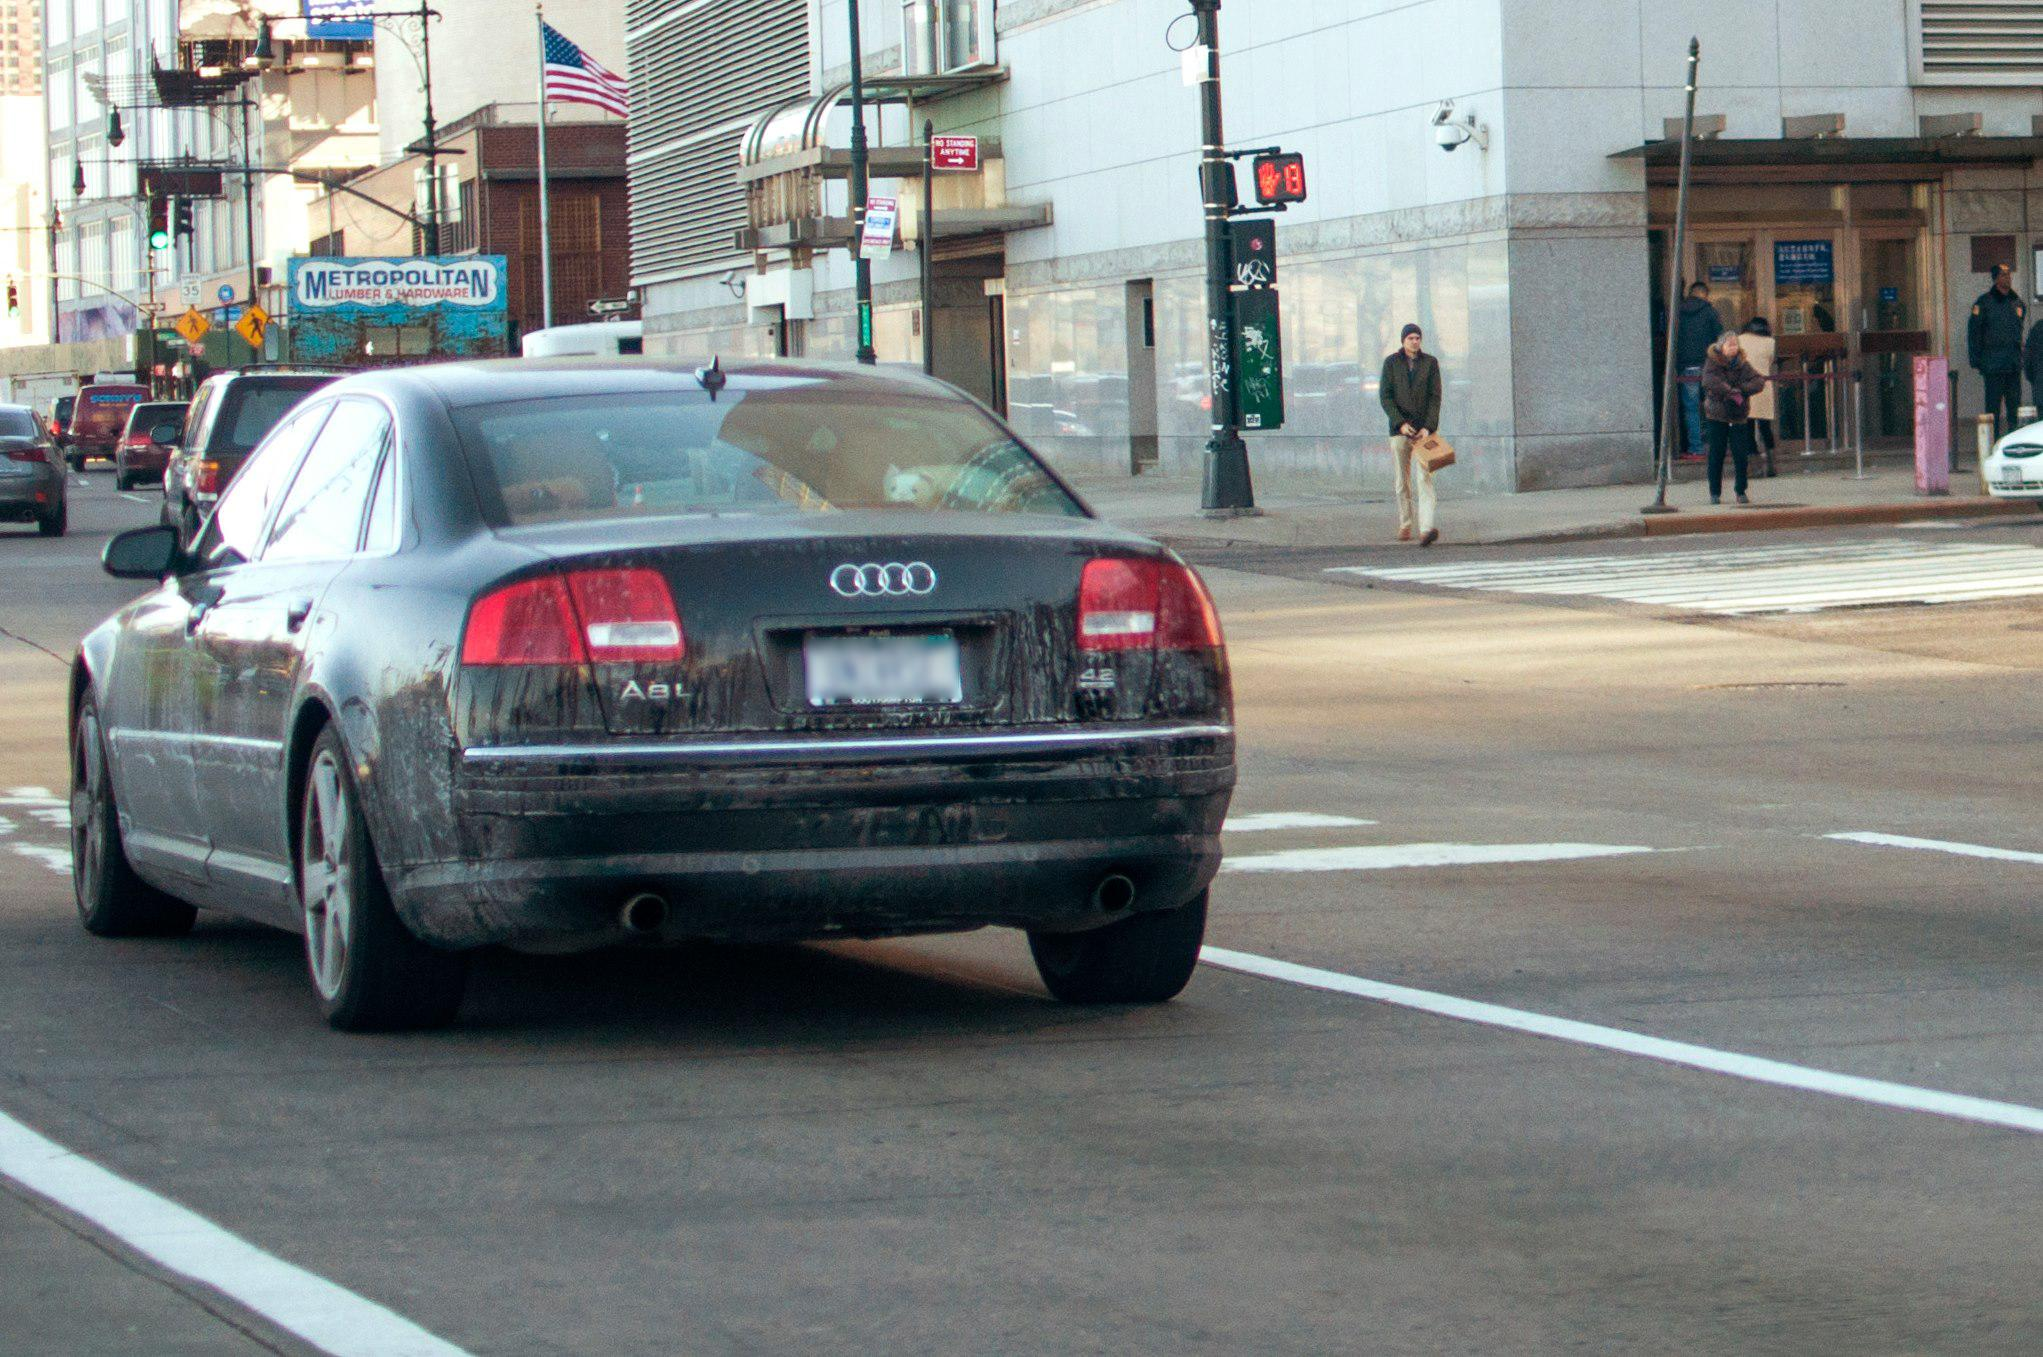

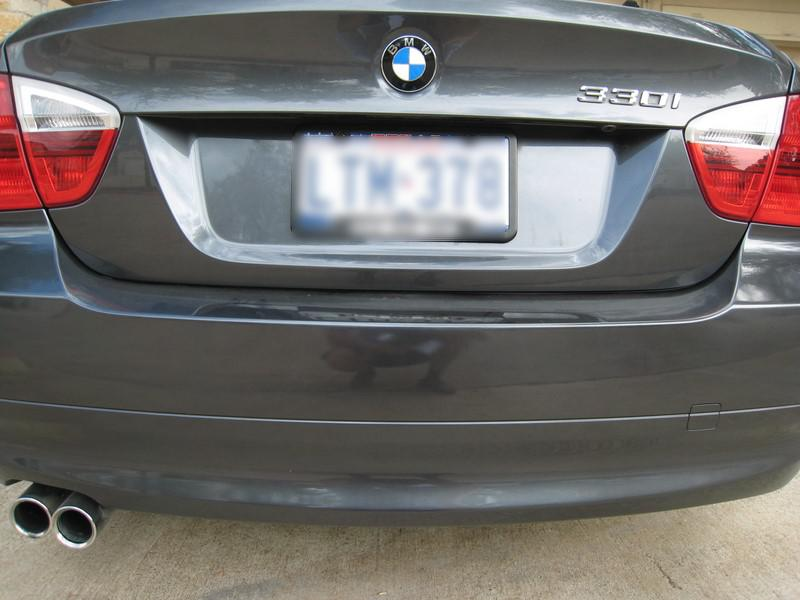

In [27]:
# Display all images under the output directory
fs = !ls $outputdir/*.*

# create list of image objects
images = [dp.Image(filename=ea, format='png') for ea in fs]

# display all images
for ea in images:
    dp.display_png(ea)